# Logistic Regression


# EXAMPLE 1

In [1]:
# import package
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
# Create model & train it
model = LogisticRegression(solver="liblinear", random_state=0)

In [4]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)

In [6]:
model.classes_

array([0, 1])

In [7]:
model.intercept_

array([-1.04608067])

In [8]:
model.coef_

array([[0.51491375]])

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model.score(x, y)

0.9

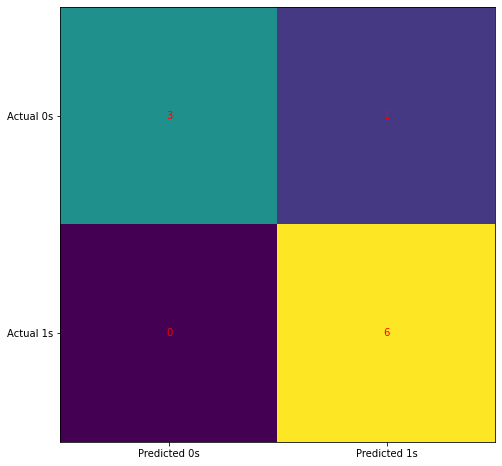

In [12]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

In [13]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [14]:
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
model.intercept_

array([-3.51335372])

In [18]:
model.coef_

array([[1.12066084]])

In [19]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [20]:
model.score(x, y)

1.0

In [21]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [22]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Example 2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv("User_Data.csv")

In [25]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values

In [27]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [30]:
y_pred = classifier.predict(xtest)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [32]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


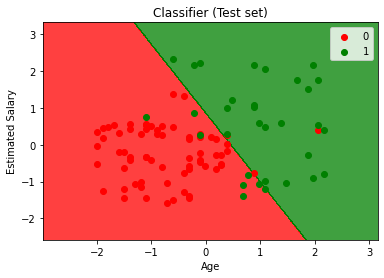

In [33]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)

plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )

plt.title("Classifier (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Example 3

# Loading Data

In [38]:
# import pandas
import pandas as pd

col_names = [
    "pregnant",
    "glucose",
    "bp",
    "skin",
    "insulin",
    "bmi",
    "pedigree",
    "age",
    "label",
]
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [39]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Selecting Feature

In [40]:
# split dataset in features and target variable
feature_cols = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
X = pima[feature_cols]  # Features
y = pima.label  # Target variable

# Splitting Data

In [42]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Model Development and Prediction

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Model Evaluation using Confusion Matrix

In [44]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

# Visualizing Confusion Matrix using Heatmap

In [45]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

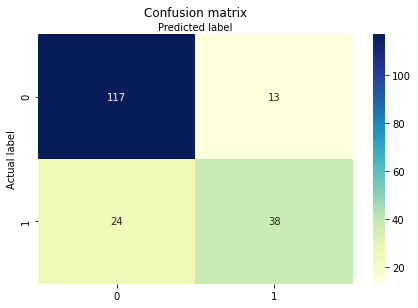

In [46]:
class_names = [0, 1]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Confusion Matrix Evaluation Metrics

In [47]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


# ROC Curve

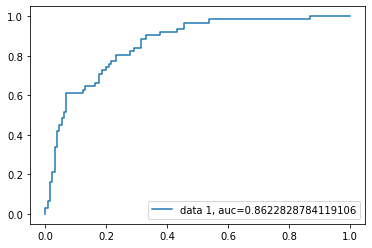

In [48]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# Example 4

In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [87]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv",
    header=0,
)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [88]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


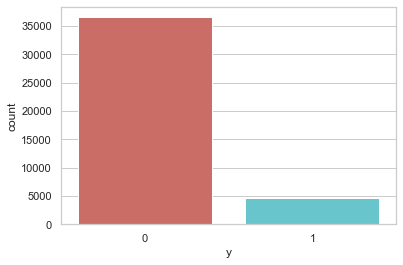

In [89]:
sns.countplot(x="y", data=data, palette="hls")
plt.show()

# Check the missing values

In [90]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

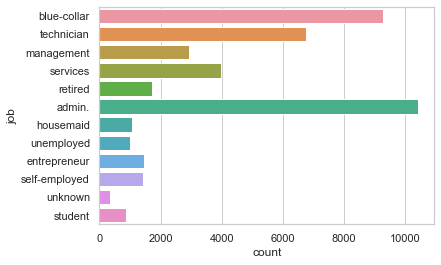

In [91]:
# Customer job distribution

sns.countplot(y="job", data=data)
plt.show()

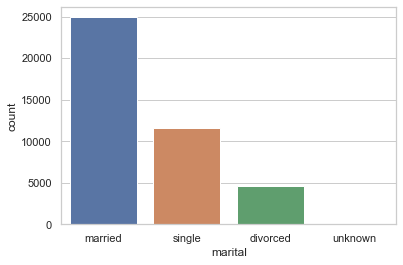

In [92]:
# Customer marital status distribution

sns.countplot(x="marital", data=data)
plt.show()

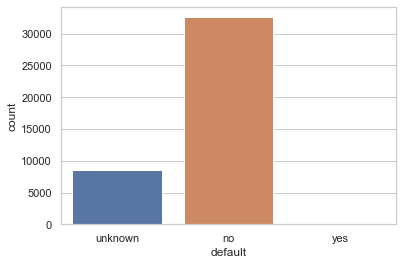

In [93]:
# Barplot for credit in default

sns.countplot(x="default", data=data)
plt.show()

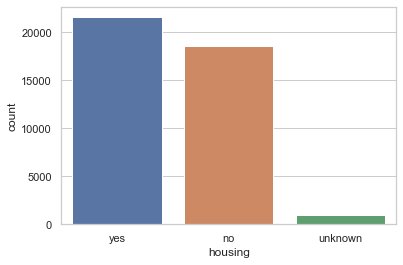

In [94]:
# Barplot for housing loan

sns.countplot(x="housing", data=data)
plt.show()

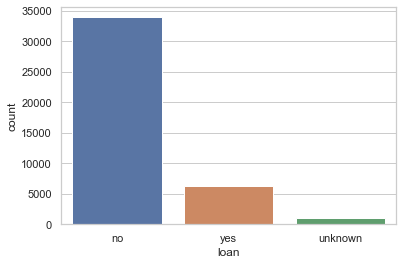

In [95]:
# Barplot for personal loan

sns.countplot(x="loan", data=data)
plt.show()

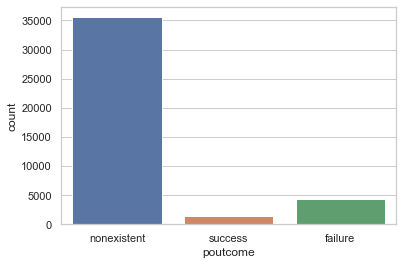

In [96]:
# Barplot for previous marketing campaign outcome

sns.countplot(x="poutcome", data=data)
plt.show()

In [97]:
data.drop(
    data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]],
    axis=1,
    inplace=True,
)

# Data Preprocessing

In [98]:
data2 = pd.get_dummies(
    data, columns=["job", "marital", "default", "housing", "loan", "poutcome"]
)

In [99]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

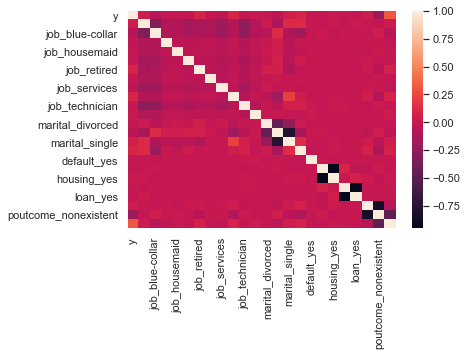

In [100]:
# Check the independence between the independent variables

sns.heatmap(data2.corr())
plt.show()

# Split the data into training and test sets

In [101]:
X = data2.iloc[:, 1:]
y = data2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [102]:
X_train.shape

(30891, 23)

# Logistic Regression Model
Fit logistic regression to the training set

In [103]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [104]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


In [106]:
# Accuracy
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        classifier.score(X_test, y_test)
    )
)

Accuracy of logistic regression classifier on test set: 0.90


# Compute precision, recall, F-measure 

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



# Classifier visualization playground

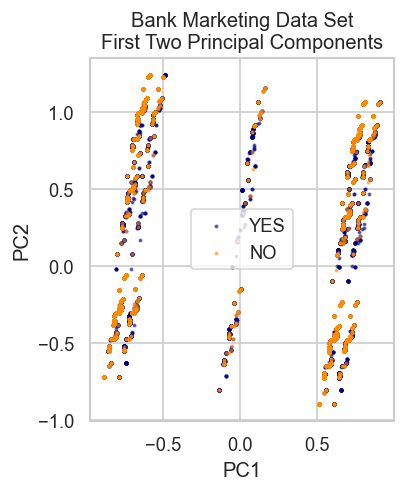

In [108]:
from sklearn.decomposition import PCA

X = data2.iloc[:, 1:]
y = data2.iloc[:, 0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(
    pca[y.values == 0, 0],
    pca[y.values == 0, 1],
    alpha=0.5,
    label="YES",
    s=2,
    color="navy",
)
plt.scatter(
    pca[y.values == 1, 0],
    pca[y.values == 1, 1],
    alpha=0.5,
    label="NO",
    s=2,
    color="darkorange",
)
plt.legend()
plt.title("Bank Marketing Data Set\nFirst Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect("equal")
plt.show()

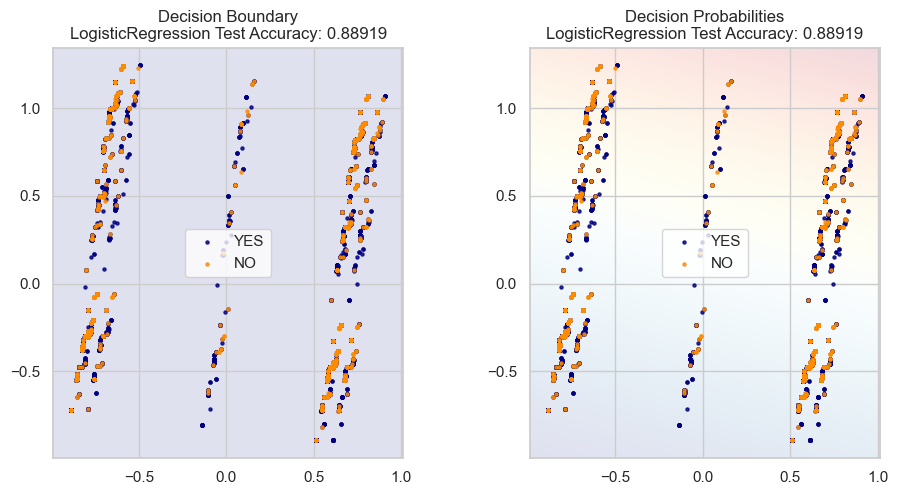

In [114]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8, 5), dpi=100)
    for i, plot_type in enumerate(["Decision Boundary", "Decision Probabilities"]):
        plt.subplot(1, 2, i + 1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, mesh_step_size),
            np.arange(y_min, y_max, mesh_step_size),
        )
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            except:
                plt.text(
                    0.4,
                    0.5,
                    "Probabilities Unavailable",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=plt.gca().transAxes,
                    fontsize=12,
                )
                plt.axis("off")
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(
            X[y.values == 0, 0],
            X[y.values == 0, 1],
            alpha=0.8,
            label="YES",
            s=5,
            color="navy",
        )
        plt.scatter(
            X[y.values == 1, 0],
            X[y.values == 1, 1],
            alpha=0.8,
            label="NO",
            s=5,
            color="darkorange",
        )
        plt.imshow(
            Z,
            interpolation="nearest",
            cmap="RdYlBu_r",
            alpha=0.15,
            extent=(x_min, x_max, y_min, y_max),
            origin="lower",
        )
        plt.title(
            plot_type
            + "\n"
            + str(fitted_model).split("(")[0]
            + " Test Accuracy: "
            + str(np.round(fitted_model.score(X, y), 5))
        )
        plt.gca().set_aspect("equal")
        plt.tight_layout()
        plt.legend()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)


model = LogisticRegression()
model.fit(X_train, y_train)
plot_bank(X_test, y_test, model)
plt.show()